In [79]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sb # for data visualization

%matplotlib inline

In [80]:
df  = pd.read_csv('test.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [81]:
#sb.pairplot(df, hue='Gender' and 'Class', size=2.5);

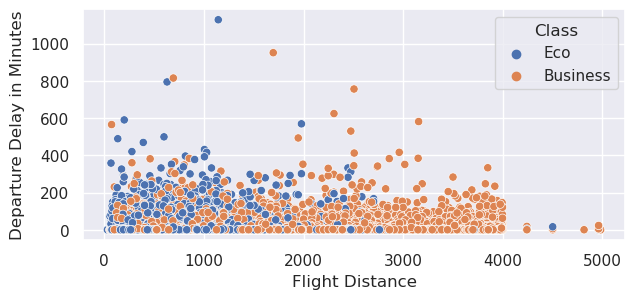

In [82]:
df = df[df['Class'] != 'Eco Plus'] 
sb.set(rc = {'figure.figsize':(7, 3)})
sb.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='Class');

In [83]:
df = df[['Flight Distance', 'Departure Delay in Minutes', 'Class']]
x = df[df.columns.difference(['Class'])].values # all columns except Class
df

,Flight Distance,Departure Delay in Minutes,Class
0,160,50,Eco
1,2863,0,Business
2,192,0,Eco
3,3377,0,Business
4,1182,0,Eco
...,...,...,...
25971,526,0,Business
25972,646,0,Business
25973,828,0,Eco
25974,1127,0,Business


In [84]:
from sklearn.cluster import KMeans
means = KMeans(n_clusters=2)

In [85]:
means.fit(x)

/home/saito/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [86]:
df['cluster'] = means.labels_

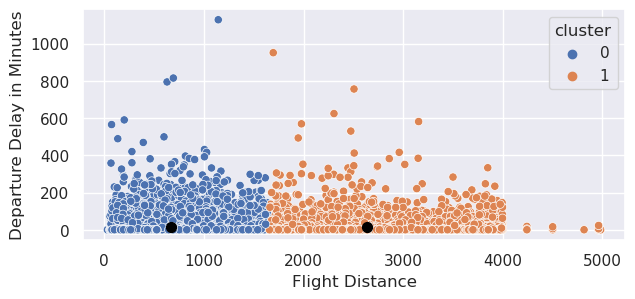

In [90]:
sb.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='cluster');
centroids = df.groupby('cluster').mean()[['Flight Distance', 'Departure Delay in Minutes']].values
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black')
